# Predictive Analysis of Drug Addiction Trends in Bangladesh

### The dataset for this project was collected from Kaggle.com. It has 26 columns in total, among which 19 columns have been used as our feature comlumns. Our target column was 'Frequency of drug usage'. The dataset has been through several preprocessing steps. Multiple classifiers have been used as trial and error. Cross validation, Hyperparameter Tuning, XAI (Explainable AI), Ensemble Methods have been explored in this project, all of which were parts of our machine learning course outline. 

## Library Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import lime
import lime.lime_tabular
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('drug2.csv')
data.head()

Age Gender          Education Live with  \
0  between 22 to 35 years   Male      Undergraduate    Hostel   
1  between 22 to 35 years   Male  H.S.C or A levels    Family   
2          15 to 22 years   Male  H.S.C or A levels    Family   
3  between 22 to 35 years   Male      Undergraduate    Family   
4  between 22 to 35 years   Male      Undergraduate    Family   

  Conflict with law Spend most time Failure in life Mental Situation  \
0                No           Alone             Yes       Depression   
1               Yes         Friends             Yes       Depression   
2               Yes         Friends             Yes       Depression   
3                No         Friends             Yes       Depression   
4                No           Alone              No       Depression   

  Suicidal thoughts Family relationship Financials of family  \
0               Yes        Satisfactory              Solvent   
1                No        Satisfactory               Medium   
2               Yes             Average               Medium   
3                No             Average              Solvent   
4                No        Satisfactory               Medium   

  Friends houses at night Satisfied with workplace Case in court  \
0             No, I don't                       No            No   
1               Sometimes                       No            No   
2               Sometimes                       No           Yes   
3               Sometimes                      Yes            No   
4               Sometimes                      Yes            No   

  Living with drug user          Smoking Ever taken drug Friends influence  \
0                   Yes  Yes, every day.             Yes               Yes   
1                    No  Yes, every day.             Yes               Yes   
2                   Yes  Yes, every day.             Yes               Yes   
3                   Yes  Yes, every day.             Yes               Yes   
4                    No  Yes, every day.              No                No   

  Prone to test drugs Frequency of drug usage  
0                 Yes               Regularly  
1               Maybe            Occasionally  
2                 Yes               Regularly  
3                 Yes               Regularly  
4                  No                   never

# Data Preprocessing

In [3]:
col = data.columns      
print(col)

Index(['Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
       'Spend most time', 'Failure in life', 'Mental Situation',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Friends houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'Prone to test drugs', 'Frequency of drug usage'],
      dtype='object')


In [4]:
label_encoder = LabelEncoder()
columns_to_encode = [
    'Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
    'Spend most time', 'Failure in life', 'Mental Situation', 'Suicidal thoughts',
    'Family relationship', 'Financials of family', 'Friends houses at night', 'Satisfied with workplace',
    'Case in court', 'Living with drug user', 'Smoking', 'Ever taken drug',
    'Friends influence', 'Prone to test drugs', 'Frequency of drug usage'
]

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [5]:
data.head(8)

Age  Gender  Education  Live with  Conflict with law  Spend most time  \
0    1       1          4          1                  0                0   
1    1       1          0          0                  1                2   
2    0       1          0          0                  1                2   
3    1       1          4          0                  0                2   
4    1       1          4          0                  0                0   
5    1       1          4          0                  0                0   
6    1       1          4          0                  0                0   
7    1       1          4          0                  0                2   

   Failure in life  Mental Situation  Suicidal thoughts  Family relationship  \
0                1                 1                  1                    2   
1                1                 1                  0                    2   
2                1                 1                  1                    0   
3                1                 1                  0                    0   
4                0                 1                  0                    2   
5                0                 1                  0                    2   
6                0                 1                  0                    2   
7                1                 4                  0                    0   

   Financials of family  Friends houses at night  Satisfied with workplace  \
0                     3                        0                         0   
1                     0                        1                         0   
2                     0                        1                         0   
3                     3                        1                         1   
4                     0                        1                         1   
5                     0                        1                         1   
6                     0                        1                         1   
7                     0                        2                         1   

   Case in court  Living with drug user  Smoking  Ever taken drug  \
0              0                      2        1                1   
1              0                      0        1                1   
2              1                      2        1                1   
3              0                      2        1                1   
4              0                      0        1                0   
5              0                      0        1                0   
6              0                      0        1                0   
7              0                      0        1                1   

   Friends influence  Prone to test drugs  Frequency of drug usage  
0                  1                    2                        1  
1                  1                    0                        0  
2                  1                    2                        1  
3                  1                    2                        1  
4                  0                    1                        2  
5                  0                    1                        2  
6                  0                    1                        2  
7                  1                    2                        0

In [6]:
descriptive_stats = pd.DataFrame()
descriptive_stats['Feature'] = data.columns
descriptive_stats['Minimum'] = data.min().values
descriptive_stats['Maximum'] = data.max().values
descriptive_stats['Sum'] = data.sum().values
descriptive_stats['Mean'] = data.mean().values
descriptive_stats['Std. Deviation'] = data.std().values
descriptive_stats['Variance'] = data.var().values
descriptive_stats['Skewness'] = data.apply(lambda x: skew(x.dropna())).values
descriptive_stats['Kurtosis'] = data.apply(lambda x: kurtosis(x.dropna())).values

print(descriptive_stats)


                     Feature  Minimum  Maximum  Sum      Mean  Std. Deviation  \
0                        Age        0        2  168  0.796209        0.618127   
1                     Gender        0        1  142  0.672986        0.470238   
2                  Education        0        4  578  2.739336        1.727458   
3                  Live with        0        1   81  0.383886        0.487487   
4          Conflict with law        0        1   52  0.246445        0.431966   
5            Spend most time        0        2  305  1.445498        0.749994   
6            Failure in life        0        1  109  0.516588        0.500913   
7           Mental Situation        0        4  398  1.886256        1.449581   
8          Suicidal thoughts        0        1   68  0.322275        0.468459   
9        Family relationship        0        2  257  1.218009        0.941052   
10      Financials of family        0        3  237  1.123223        1.251278   
11   Friends houses at night

In [7]:
numeric_columns = ['Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
       'Spend most time', 'Failure in life', 'Mental Situation',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Friends houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'Prone to test drugs', 'Frequency of drug usage']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

In [8]:
X = data[['Age', 'Gender', 'Education', 'Live with', 'Conflict with law',
       'Spend most time', 'Failure in life', 'Mental Situation',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Friends houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'Prone to test drugs']]
y = data['Frequency of drug usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

print(f"Number of data points in the training set: {num_train_samples}")
print(f"Number of data points in the testing set: {num_test_samples}")

Number of data points in the training set: 168
Number of data points in the testing set: 43


# Model Training 

# Random Forest

Train Accuracy: 1.0
Test Accuracy: 0.9534883720930233
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      0.95      0.98        22

    accuracy                           0.95        43
   macro avg       0.96      0.93      0.94        43
weighted avg       0.96      0.95      0.95        43



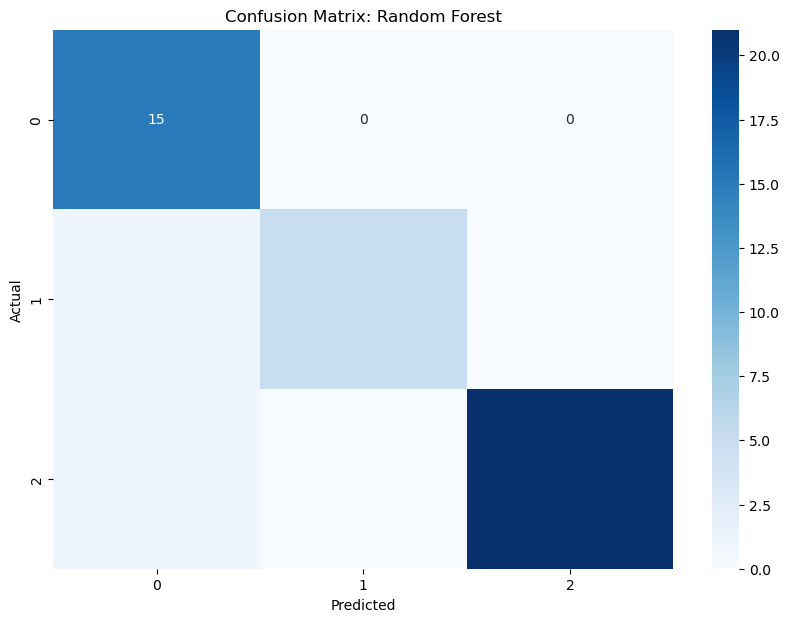

In [10]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

cm_rf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

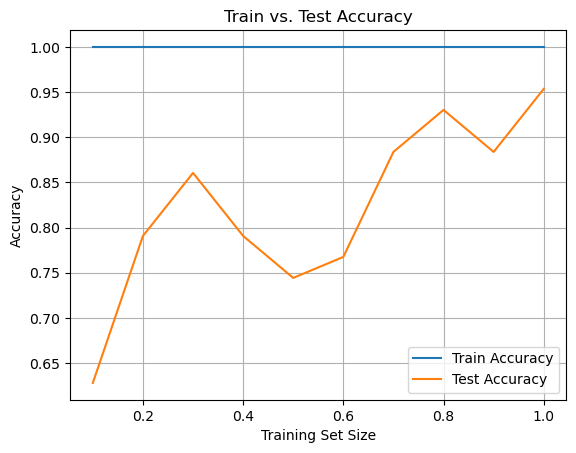

In [11]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_accs = []
test_accs = []

for train_size in train_sizes:
    num_train_samples = int(train_size * len(X_train))
    
   
    X_train_subset = X_train[:num_train_samples]
    y_train_subset = y_train[:num_train_samples]
    
    model_rf.fit(X_train_subset, y_train_subset)
    
    y_train_pred = model_rf.predict(X_train_subset)
    y_test_pred = model_rf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_subset, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)


plt.plot(train_sizes, train_accs, label='Train Accuracy')
plt.plot(train_sizes, test_accs, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Train vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

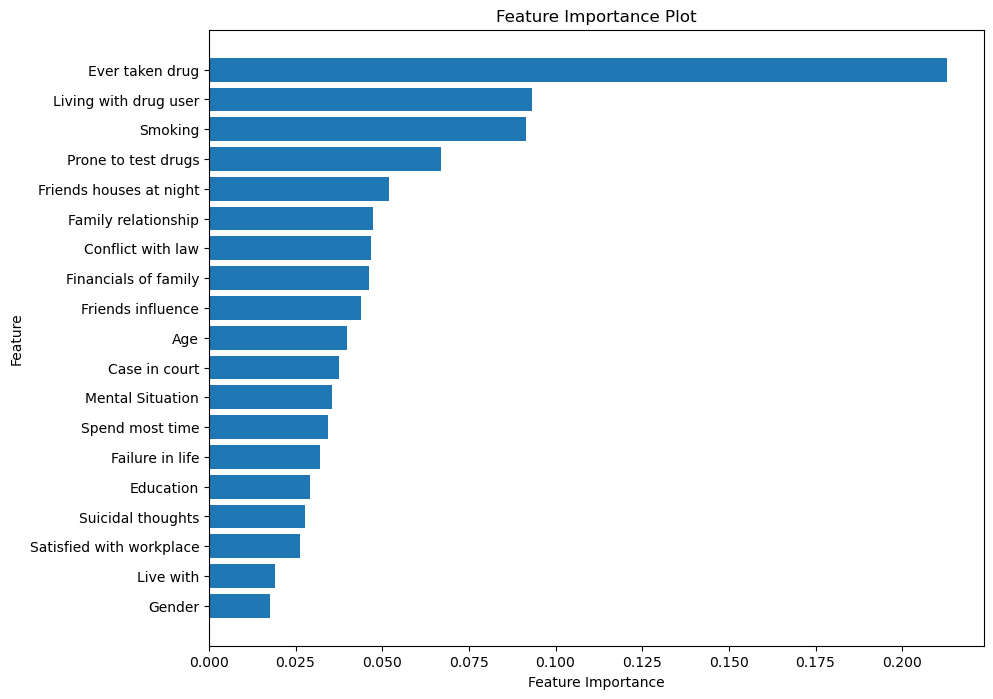

In [12]:
import matplotlib.pyplot as plt

feature_importances = model_rf.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

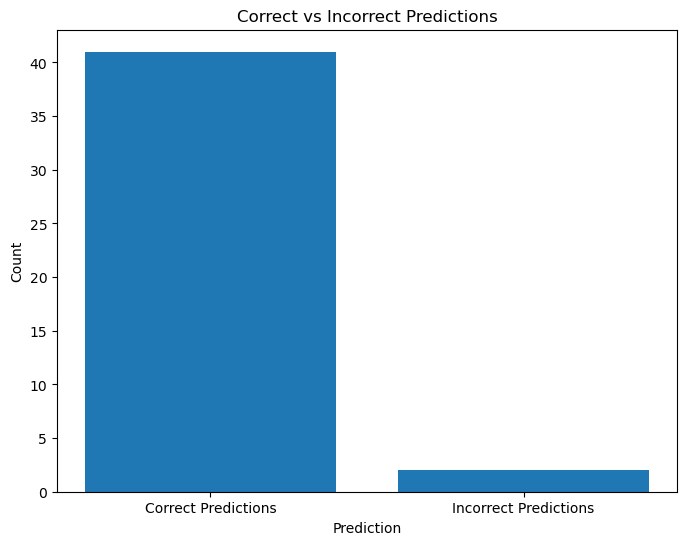

In [13]:
def plot_error_histogram(model, X, y_true, bins=20):
    """
    Plot histogram of correct and incorrect predictions.

    Parameters:
        model: scikit-learn classifier
            The trained classifier model.
        X: array-like or sparse matrix
            The feature matrix.
        y_true: array-like
            The true target labels.
        bins: int, optional (default: 20)
            Number of bins for the histogram.
    """
    y_pred = model.predict(X)
    
    correct_predictions = np.sum(y_pred == y_true)
    incorrect_predictions = np.sum(y_pred != y_true)

    plt.figure(figsize=(8, 6))
    plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions, incorrect_predictions])
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.title('Correct vs Incorrect Predictions')
    plt.show()


plot_error_histogram(model_rf, X_test, y_test)


# Decision Tree

Accuracy (original model): 0.84
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.50      0.83      0.62         6
           2       1.00      0.95      0.98        22

    accuracy                           0.84        43
   macro avg       0.78      0.82      0.78        43
weighted avg       0.87      0.84      0.85        43



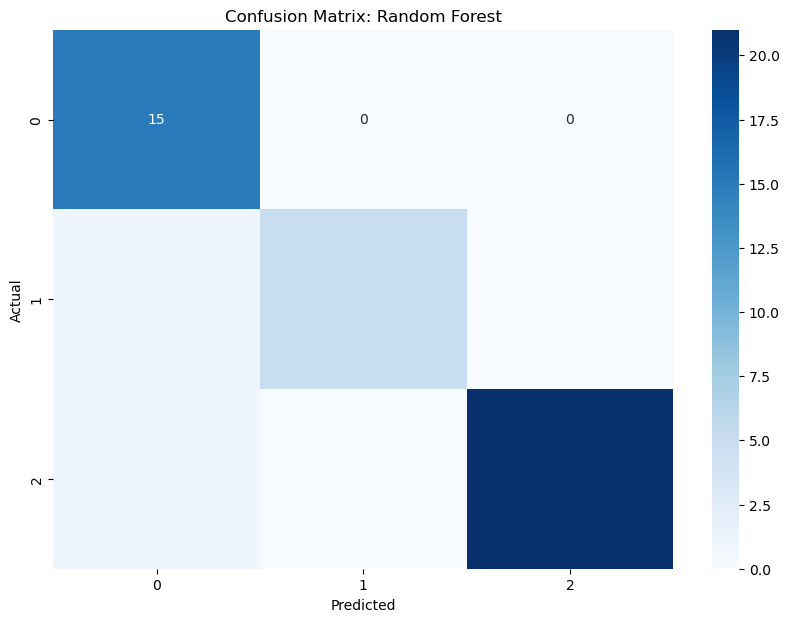

In [14]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy (original model): {accuracy:.2f}")
print("Classification Report :")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()


# XG Boost

F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.79
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.44      0.67      0.53         6
           2       0.92      1.00      0.96        22

    accuracy                           0.79        43
   macro avg       0.72      0.73      0.71        43
weighted avg       0.81      0.79      0.79        43



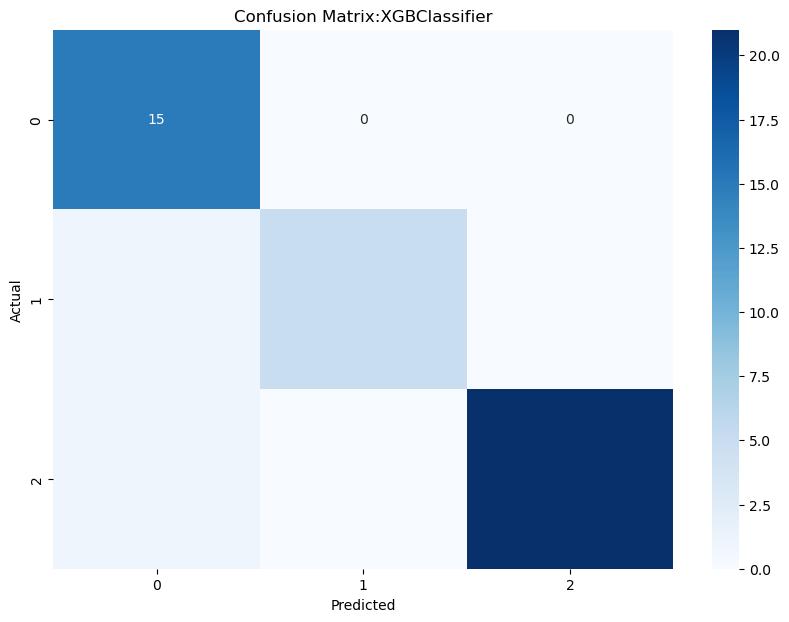

In [15]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix:XGBClassifier')
plt.show()

# Gradient Boosting

Gradient Boosting Accuracy: 0.81
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.44      0.67      0.53         6
           2       0.96      1.00      0.98        22

    accuracy                           0.81        43
   macro avg       0.74      0.76      0.73        43
weighted avg       0.84      0.81      0.82        43



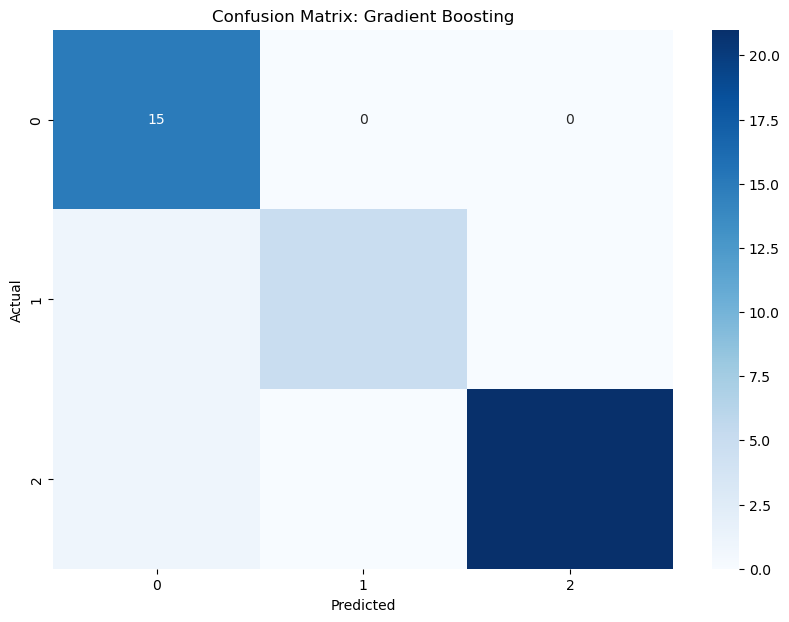

In [16]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()

# KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



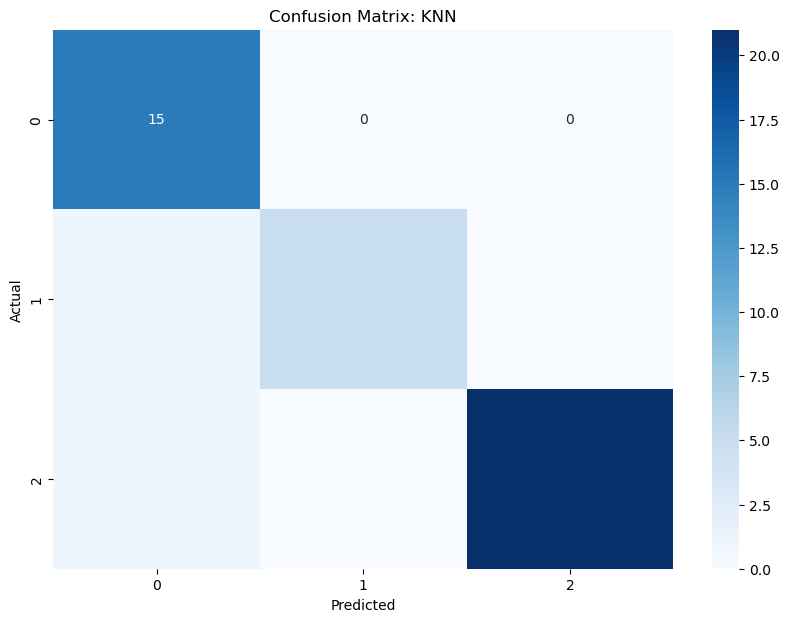

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: KNN')
plt.show()

# SVC

Best Parameters for SVC: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
Best Score for SVC: 0.7620320855614974
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



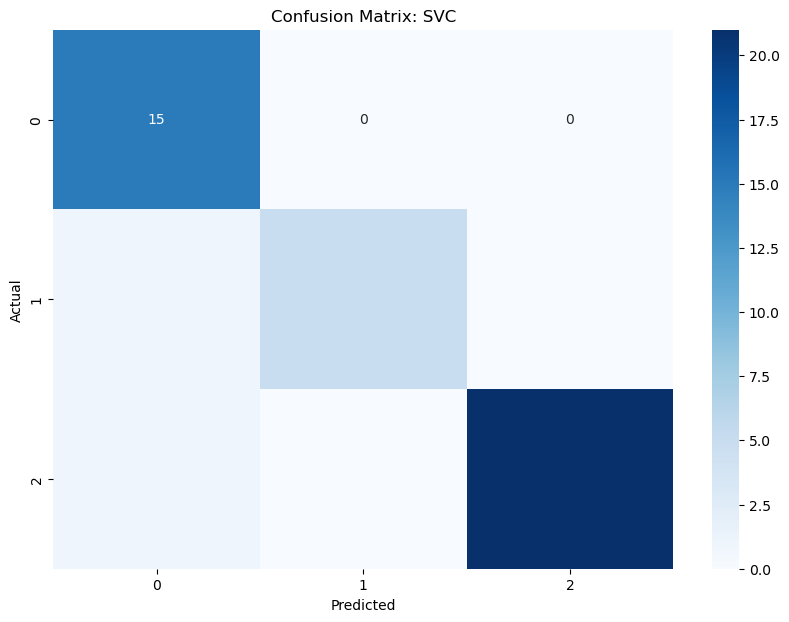

In [18]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'gamma': ['scale', 'auto'],  
}


svc = SVC(random_state=42)

random_search_svc = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=5,
                                       scoring='accuracy', cv=5, random_state=22)


random_search_svc.fit(X_train, y_train)

best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_

print("Best Parameters for SVC:", best_params_svc)
print("Best Score for SVC:", best_score_svc)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: SVC')
plt.show()

# Naive Bayes

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Score for Naive Bayes: 0.8037433155080214
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



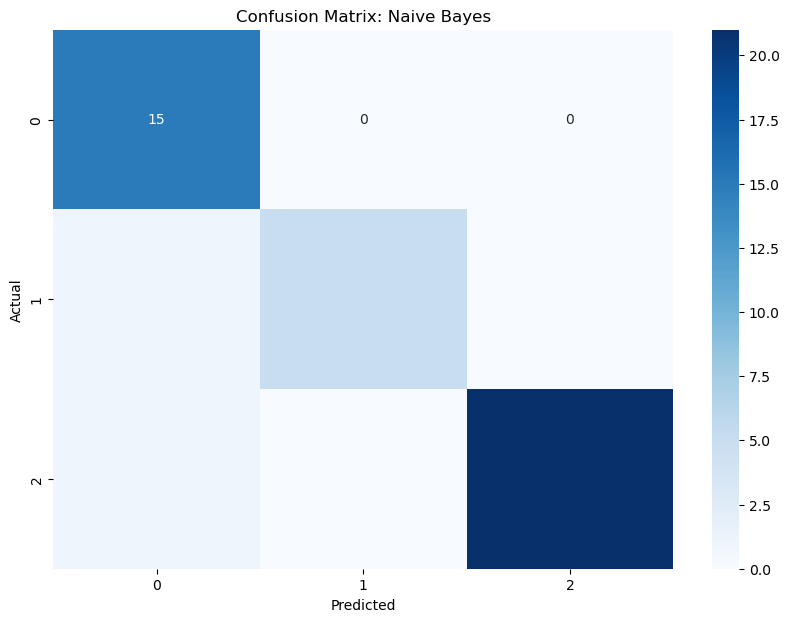

In [19]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing parameter
}


nb = GaussianNB()

random_search_nb = RandomizedSearchCV(estimator=nb, param_distributions=param_grid, n_iter=5,
                                      scoring='accuracy', cv=5, random_state=41)

random_search_nb.fit(X_train, y_train)


best_params_nb = random_search_nb.best_params_
best_score_nb = random_search_nb.best_score_

print("Best Parameters for Naive Bayes:", best_params_nb)
print("Best Score for Naive Bayes:", best_score_nb)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Naive Bayes')
plt.show()

# Ensemble

F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Accuracy: 0.8604651162790697
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.57      0.67      0.62         6
           2       1.00      0.95      0.98        22

    accuracy                           0.86        43
   macro avg       0.79      0.81      0.80        43
weighted avg       0.87      0.86      0.86        43



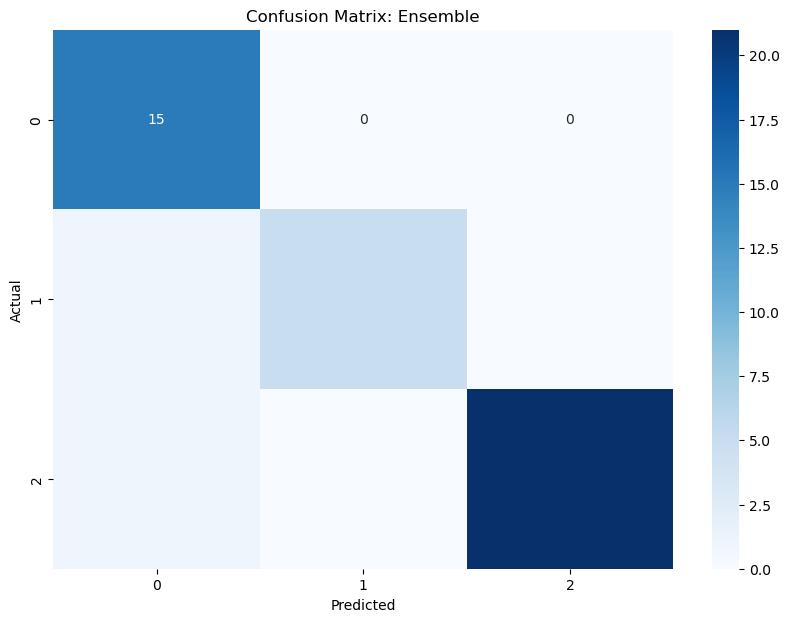

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(max_depth=3, random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svc_classifier = SVC(kernel='rbf', probability=True)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier(max_depth=3,random_state=42)

ensemble = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('xgb', xgb_classifier),
    ('knn', knn_classifier),
    ('svc', svc_classifier),
    ('nb', nb_classifier),
    ('dt', dt_classifier)
], voting='soft')

ensemble.fit(X_train, y_train)


y_pred = ensemble.predict(X_test)

report = classification_report(y_test, y_pred)

ensemble_accuracy = ensemble.score(X_test, y_test)
print("Ensemble Accuracy:", ensemble_accuracy)


print("Classification Report for Ensemble Model:\n", report)


y_pred = ensemble.predict(X_test)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Ensemble')
plt.show()


# Cross Validation

In [21]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42)
}
cv_scores = {}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)  
    cv_scores[name] = scores


for name, scores in cv_scores.items():
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"Mean {name} Cross-Validation Score: {scores.mean()}\n")

F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46

Random Forest Cross-Validation Scores: [0.82352941 0.76470588 0.82352941 0.84848485 0.81818182]
Mean Random Forest Cross-Validation Score: 0.8156862745098039

Gradient Boosting Cross-Validation Scores: [0.79411765 0.73529412 0.85294118 0.81818182 0.75757576]
Mean Gradient Boosting Cross-Validation Score: 0.7916221033868093

XGBoost Cross-Validation Scores: [0.76470588 0.73529412 0.79411765 0.78787879 0.84848485]
Mean XGBoost Cross-Validation Score: 0.786096256684492

K-Nearest Neighbors Cross-Validation Scores: [0.64705882 0.64705882 0.67647059 0.66666667 0.75757576]
Mean K-Nearest Neighbors Cross-Validation Score: 0.6789661319073084

SVC Cross-Validation Scores: [0.79411765 0.70588235 0.70588235 0.72727273 0.75757576]
Mean SVC Cross-Validation Score: 0.7381461675579324

Gaussian Naive Bayes Cross-Validation Scores: [0.82352941 0.76470588 0.79411765 0.81818182 0.81818182]
Mean Gaussian Naive Bayes Cross-Validation Score: 0.8037433155080214

Decision Tree Cross-Validation Scores: [0.823

F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Hyperparameter 

In [22]:
best_params = {}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}


param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


models_params = {
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(), param_grid_gb),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn),
    'SVC': (SVC(), param_grid_svc),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt)
}

for name, (clf, param_grid) in models_params.items():
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_


for name, params in best_params.items():
    print(f"Best hyperparameters for {name}: {params}")


F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 1.0}
Best hyperparameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best hyperparameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best hyperparameters for Decision Tree: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


F:\ana install\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


# All Models together and Ensembled Best Three perforemers

Classifier: Random Forest
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      0.95      0.98        22

    accuracy                           0.95        43
   macro avg       0.96      0.93      0.94        43
weighted avg       0.96      0.95      0.95        43



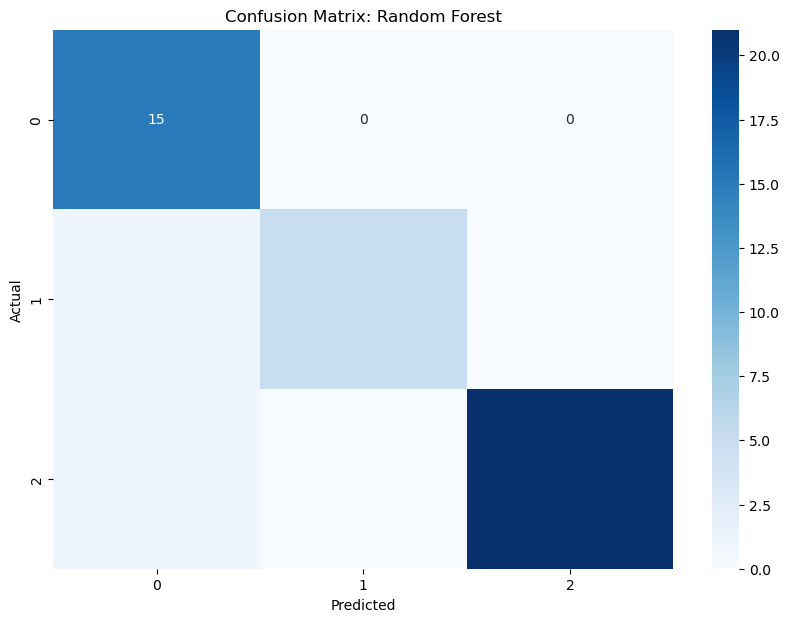

Classifier: Gradient Boosting
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.44      0.67      0.53         6
           2       0.96      1.00      0.98        22

    accuracy                           0.81        43
   macro avg       0.74      0.76      0.73        43
weighted avg       0.84      0.81      0.82        43



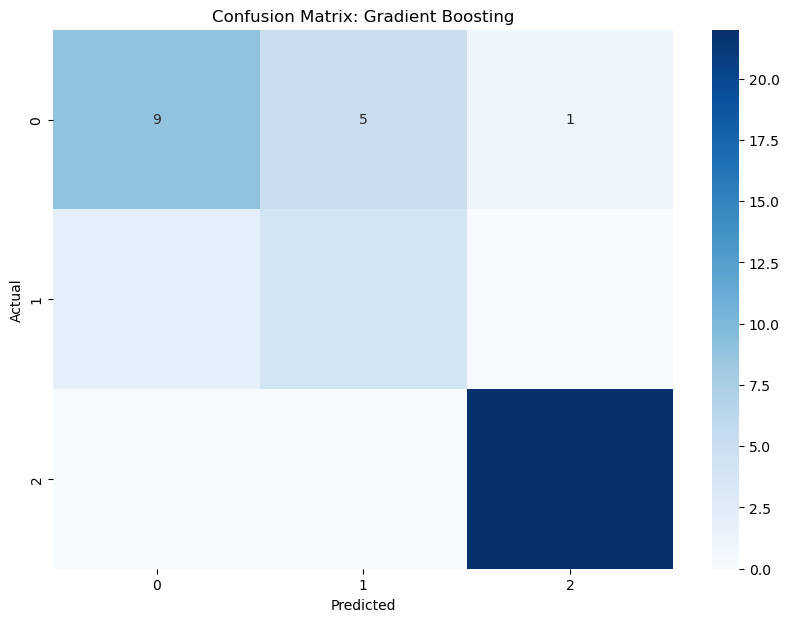

Classifier: XGBoost
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.44      0.67      0.53         6
           2       0.92      1.00      0.96        22

    accuracy                           0.79        43
   macro avg       0.72      0.73      0.71        43
weighted avg       0.81      0.79      0.79        43



F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


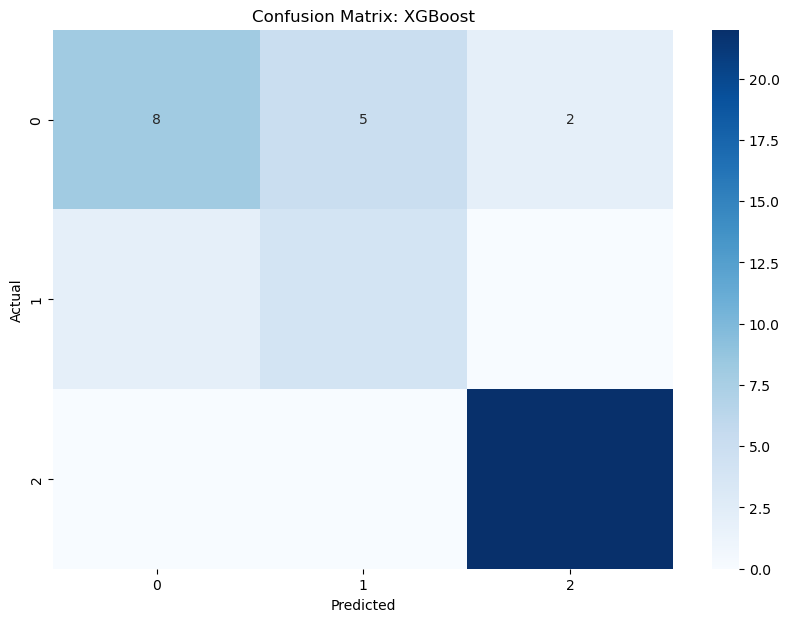

Classifier: K-Nearest Neighbors
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.67      0.73         6
           2       0.81      0.95      0.88        22

    accuracy                           0.81        43
   macro avg       0.81      0.76      0.78        43
weighted avg       0.82      0.81      0.81        43



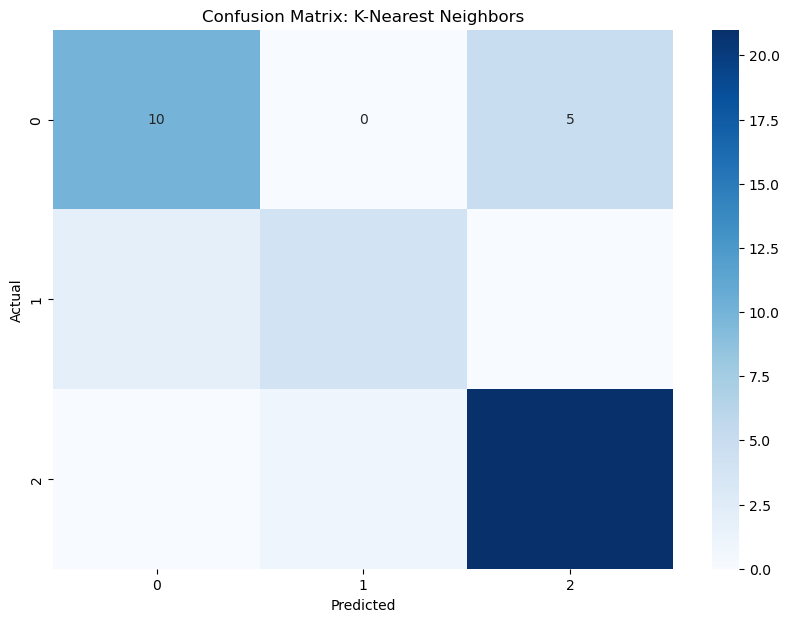

Classifier: SVC
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.67      0.33      0.44         6
           2       0.95      0.95      0.95        22

    accuracy                           0.86        43
   macro avg       0.80      0.74      0.75        43
weighted avg       0.85      0.86      0.85        43



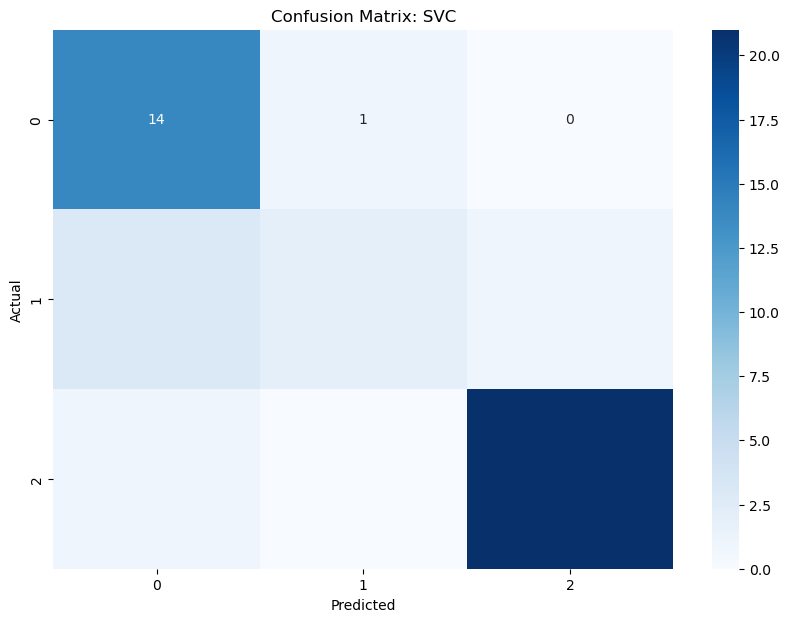

Classifier: Gaussian Naive Bayes
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.57      0.67      0.62         6
           2       1.00      0.95      0.98        22

    accuracy                           0.86        43
   macro avg       0.79      0.81      0.80        43
weighted avg       0.87      0.86      0.86        43



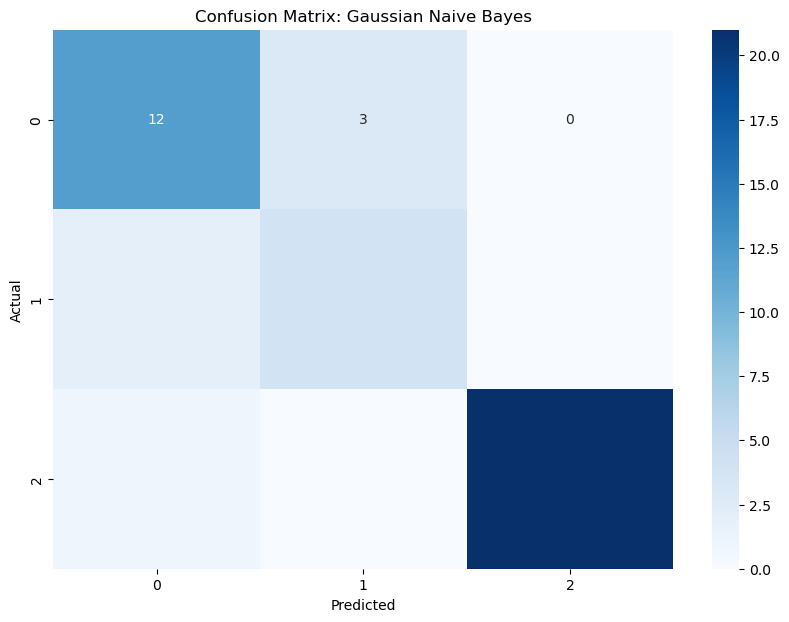

Classifier: Decision Tree
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.50      0.83      0.62         6
           2       1.00      0.95      0.98        22

    accuracy                           0.84        43
   macro avg       0.78      0.82      0.78        43
weighted avg       0.87      0.84      0.85        43



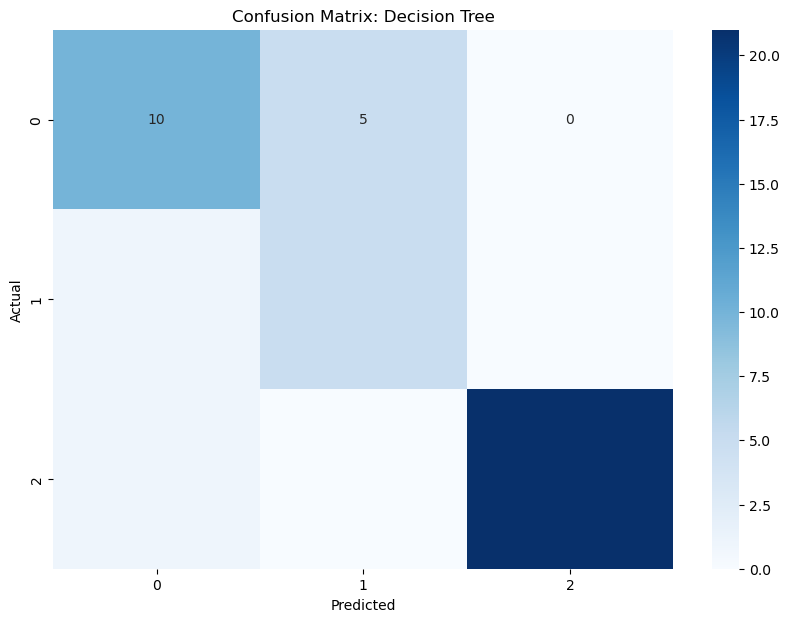

Top 3 Performers:
Classifier: Random Forest, Accuracy: 0.95, F1-Score: 0.95
Classifier: Gaussian Naive Bayes, Accuracy: 0.86, F1-Score: 0.86
Classifier: SVC, Accuracy: 0.86, F1-Score: 0.85
Ensemble Accuracy: 0.8837209302325582
Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.67      0.67      0.67         6
           2       1.00      0.95      0.98        22

    accuracy                           0.88        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.89      0.88      0.89        43



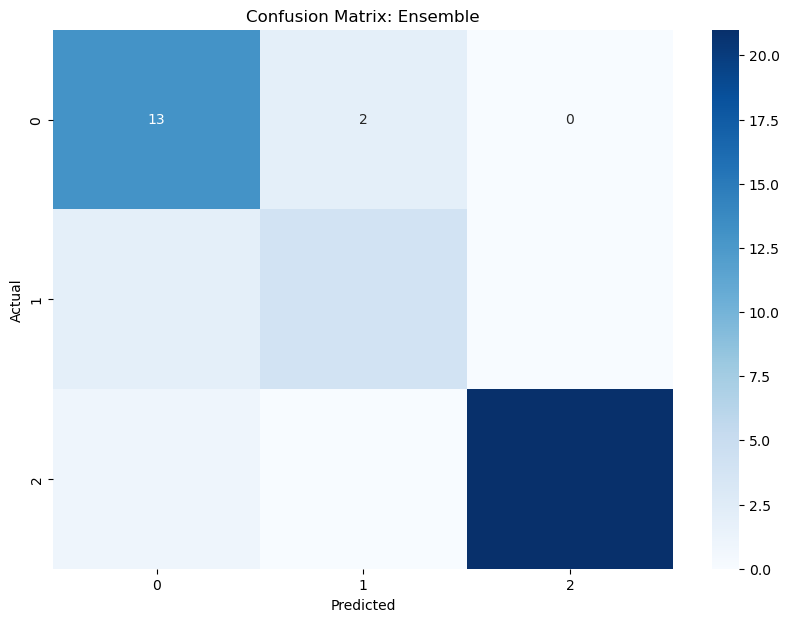

In [23]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42)
}


performance = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    performance.append((name, accuracy, report['weighted avg']['f1-score']))
    
  
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

performance.sort(key=lambda x: (x[1], x[2]), reverse=True)


top_3_performers = performance[:3]


print("Top 3 Performers:")
for name, accuracy, f1_score in top_3_performers:
    print(f"Classifier: {name}, Accuracy: {accuracy:.2f}, F1-Score: {f1_score:.2f}")


top_classifiers = {name: clf for name, clf in classifiers.items() if name in [name for name, _, _ in top_3_performers]}


ensemble = VotingClassifier(estimators=[(name, clf) for name, clf in top_classifiers.items()], voting='soft')


ensemble.fit(X_train, y_train)

ensemble_accuracy = ensemble.score(X_test, y_test)
y_pred_ensemble = ensemble.predict(X_test)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print("Ensemble Accuracy:", ensemble_accuracy)
print("Classification Report for Ensemble Model:\n", report_ensemble)


cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=ensemble.classes_, yticklabels=ensemble.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Ensemble')
plt.show()


# Performance Evaluation 

In [24]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42)
}


results = []


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': report_test['weighted avg']['precision'],
        'Recall': report_test['weighted avg']['recall'],
        'F1-Score': report_test['weighted avg']['f1-score']
    })


ensemble = VotingClassifier(estimators=[
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('xgb', classifiers['XGBoost']),
    ('knn', classifiers['K-Nearest Neighbors']),
    ('svc', classifiers['SVC']),
    ('nb', classifiers['Gaussian Naive Bayes']),
    ('dt', classifiers['Decision Tree'])
], voting='soft')


ensemble.fit(X_train, y_train)
y_pred_train_ensemble = ensemble.predict(X_train)
y_pred_test_ensemble = ensemble.predict(X_test)
train_accuracy_ensemble = accuracy_score(y_train, y_pred_train_ensemble)
test_accuracy_ensemble = accuracy_score(y_test, y_pred_test_ensemble)
report_test_ensemble = classification_report(y_test, y_pred_test_ensemble, output_dict=True)

results.append({
    'Model': 'Ensemble',
    'Train Accuracy': train_accuracy_ensemble,
    'Test Accuracy': test_accuracy_ensemble,
    'Precision': report_test_ensemble['weighted avg']['precision'],
    'Recall': report_test_ensemble['weighted avg']['recall'],
    'F1-Score': report_test_ensemble['weighted avg']['f1-score']
})


results_df = pd.DataFrame(results)


print(results_df)




F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                  Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0         Random Forest        1.000000       0.953488   0.958960  0.953488   
1     Gradient Boosting        1.000000       0.813953   0.836811  0.813953   
2               XGBoost        1.000000       0.790698   0.810078  0.790698   
3   K-Nearest Neighbors        0.797619       0.813953   0.815564  0.813953   
4                   SVC        0.904762       0.860465   0.852713  0.860465   
5  Gaussian Naive Bayes        0.827381       0.860465   0.870432  0.860465   
6         Decision Tree        0.845238       0.837209   0.872093  0.837209   
7              Ensemble        0.970238       0.860465   0.870432  0.860465   

   F1-Score  
0  0.953614  
1  0.816180  
2  0.787058  
3  0.807552  
4  0.846371  
5  0.864667  
6  0.845337  
7  0.864667  


F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


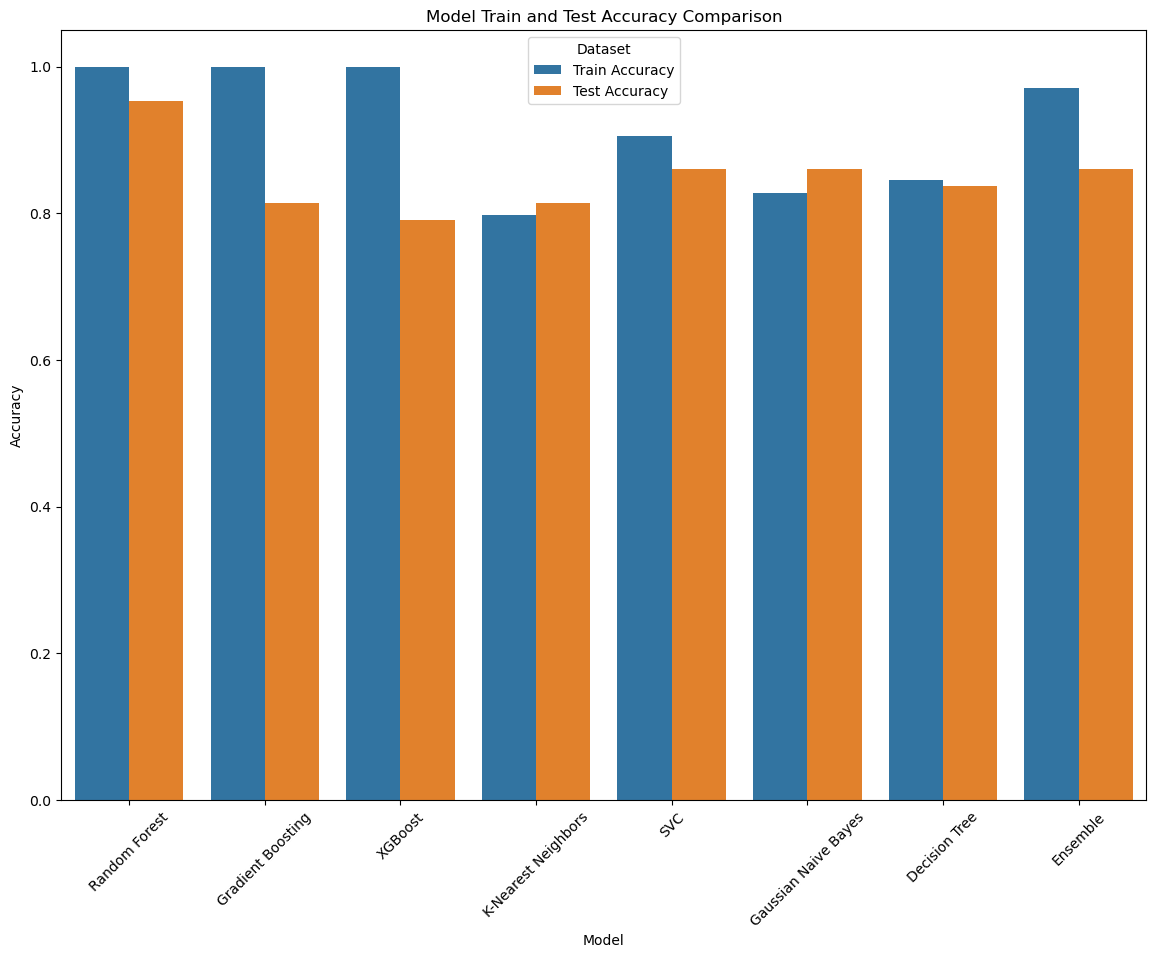

In [25]:
results_melted_accuracy = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                                          var_name='Dataset', value_name='Accuracy')

plt.figure(figsize=(14, 10))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=results_melted_accuracy)
plt.title('Model Train and Test Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


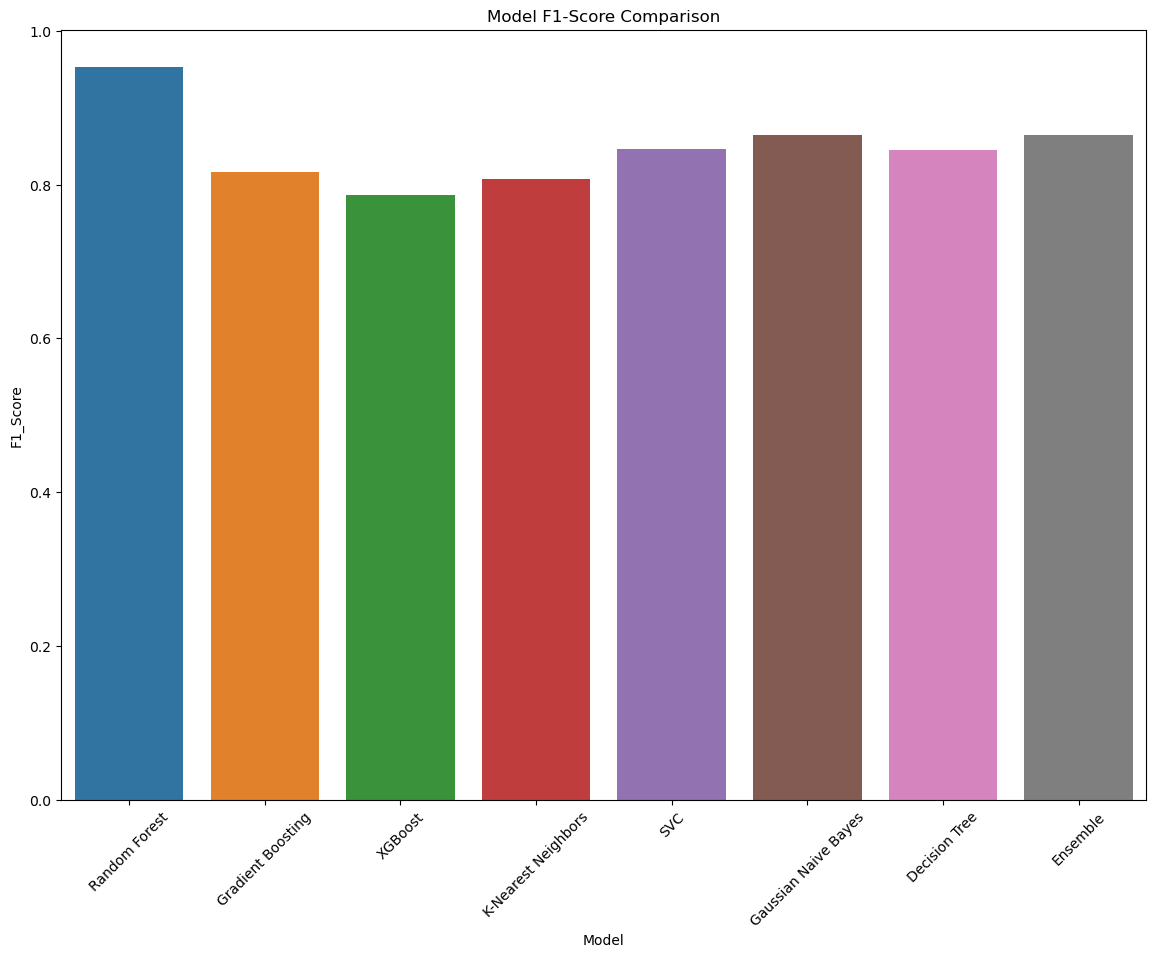

In [26]:
results_melted_f1 = results_df.melt(id_vars='Model', value_vars=['F1-Score'],
                                    var_name='Metric', value_name='F1_Score')

plt.figure(figsize=(14, 10))
sns.barplot(x='Model', y='F1_Score', data=results_melted_f1)
plt.title('Model F1-Score Comparison')
plt.xticks(rotation=45)
plt.show()

F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


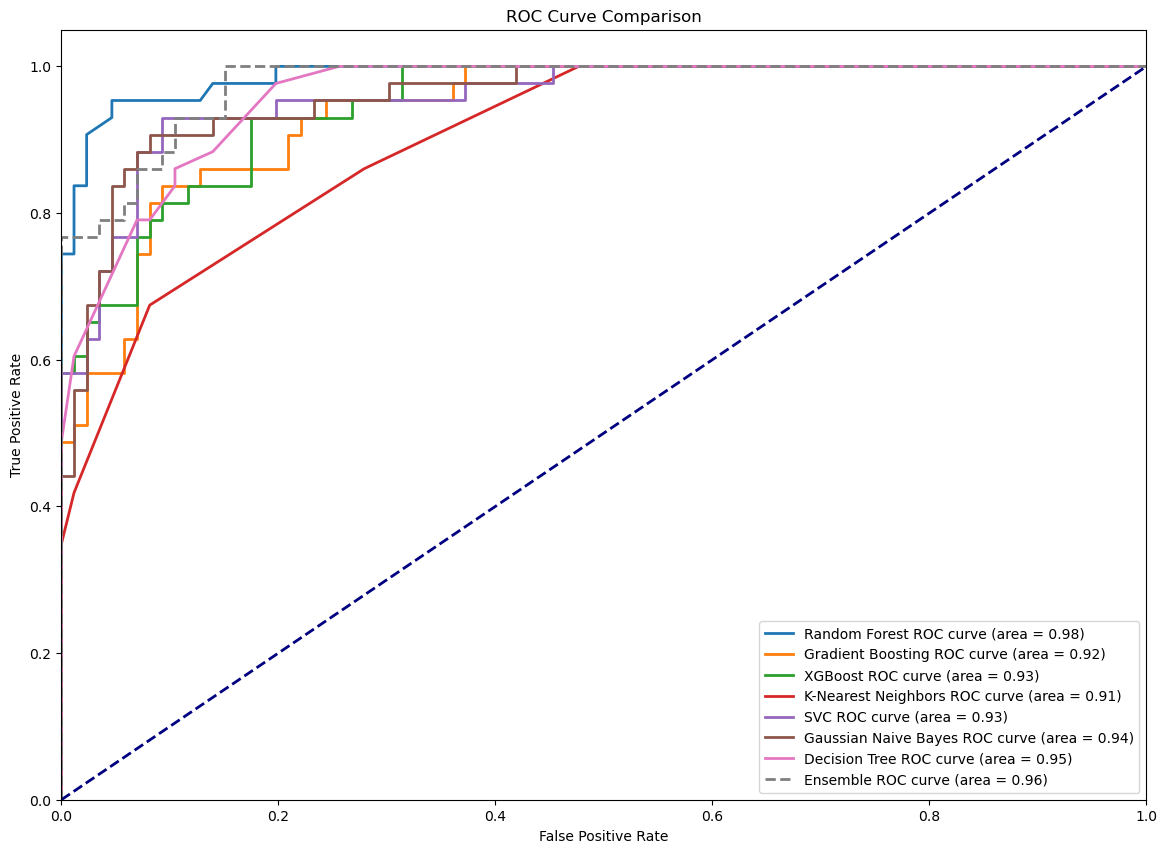

In [27]:
n_classes = len(np.unique(y_train))
y_train_bin = label_binarize(y_train, classes=np.arange(n_classes))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42)
}

plt.figure(figsize=(14, 10))

def compute_roc_auc(clf, X_test, y_test_bin, n_classes):
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    else:
        y_score = clf.decision_function(X_test)
        y_score = np.vstack([1 - y_score, y_score]).T  # Adjust to match predict_proba format
    
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    return fpr, tpr, roc_auc

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    fpr, tpr, roc_auc = compute_roc_auc(clf, X_test, y_test_bin, n_classes)
    plt.plot(fpr, tpr, lw=2, label=f'{name} ROC curve (area = {roc_auc:.2f})')


ensemble = VotingClassifier(estimators=[
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('xgb', classifiers['XGBoost']),
    ('knn', classifiers['K-Nearest Neighbors']),
    ('svc', classifiers['SVC']),
    ('nb', classifiers['Gaussian Naive Bayes']),
    ('dt', classifiers['Decision Tree'])
], voting='soft')

ensemble.fit(X_train, y_train)
fpr, tpr, roc_auc = compute_roc_auc(ensemble, X_test, y_test_bin, n_classes)
plt.plot(fpr, tpr, lw=2, linestyle='--', label=f'Ensemble ROC curve (area = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
F:\ana install\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


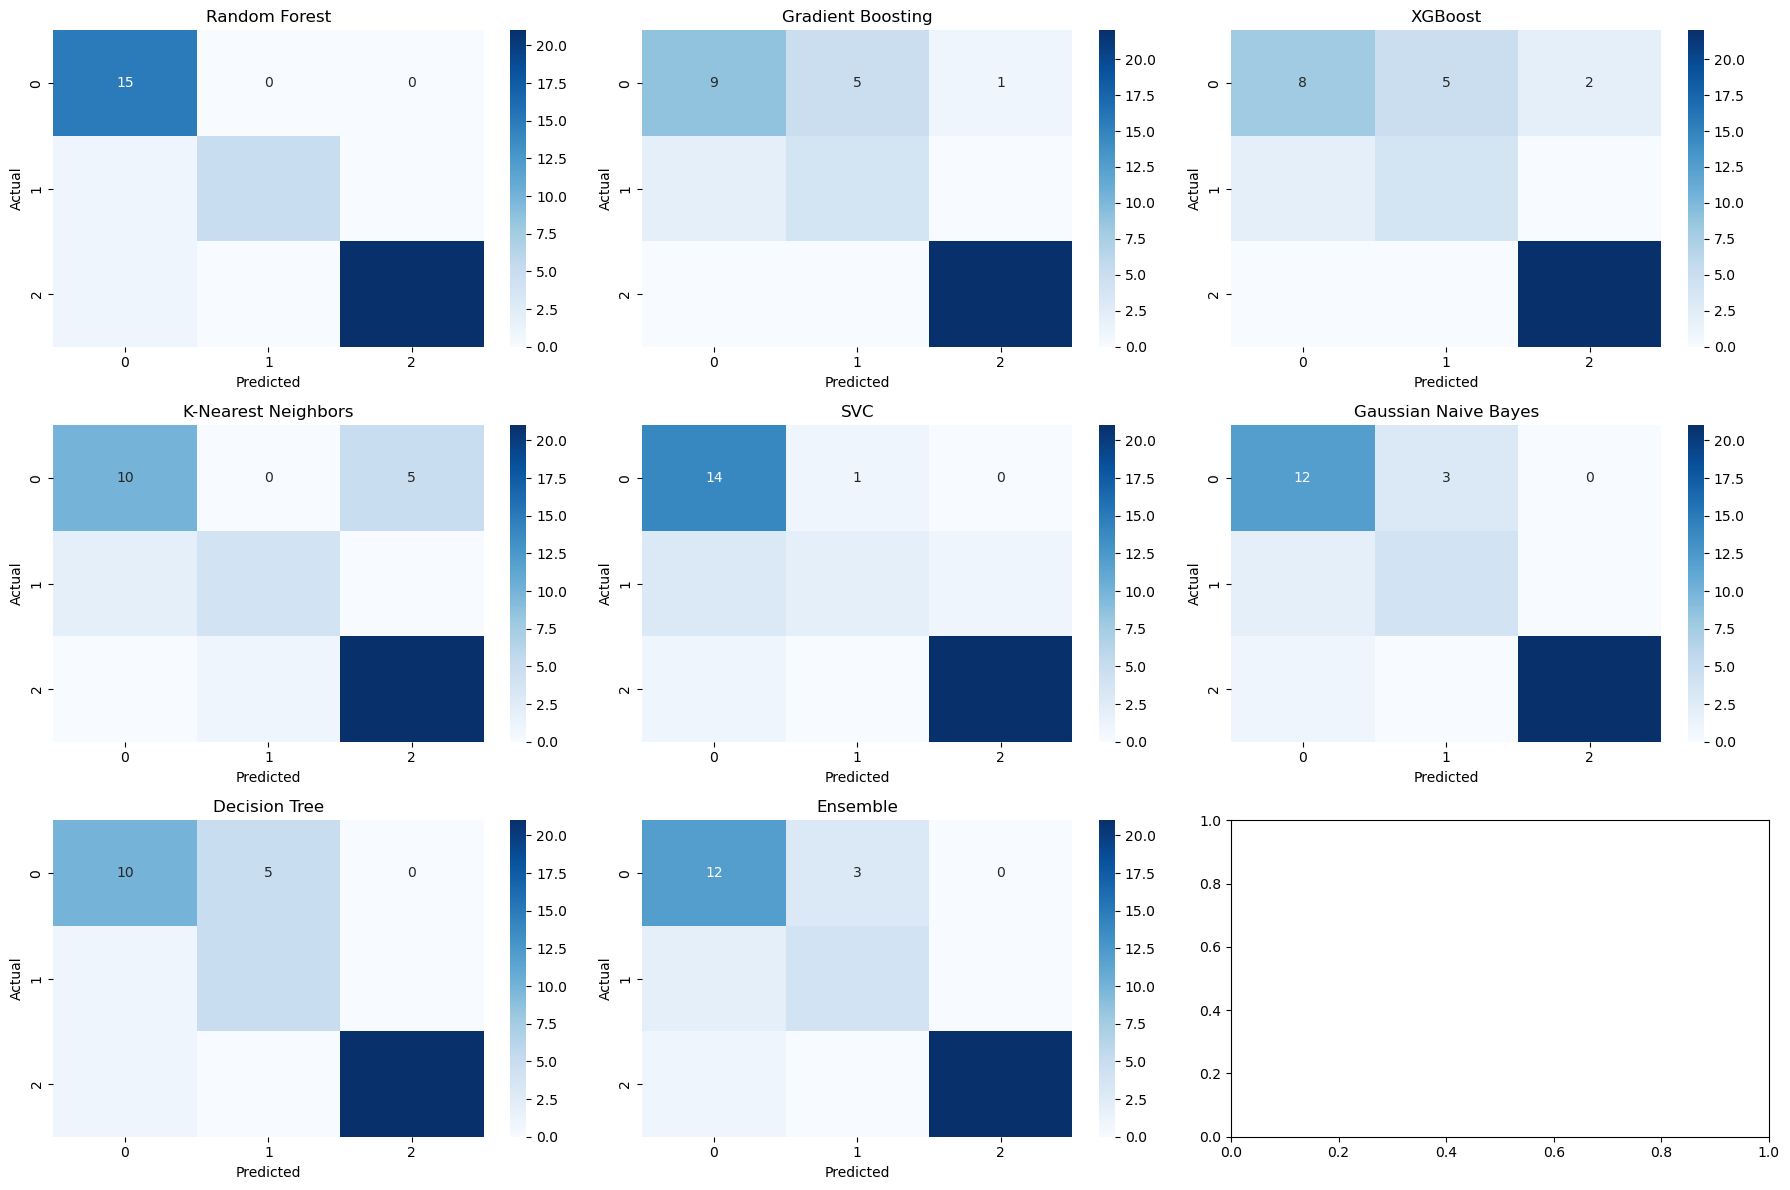

In [28]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', probability=True),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42)
}


ensemble = VotingClassifier(estimators=[
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('xgb', classifiers['XGBoost']),
    ('knn', classifiers['K-Nearest Neighbors']),
    ('svc', classifiers['SVC']),
    ('nb', classifiers['Gaussian Naive Bayes']),
    ('dt', classifiers['Decision Tree'])
], voting='soft')

classifiers['Ensemble'] = ensemble


n_classifiers = len(classifiers)
n_cols = 3
n_rows = (n_classifiers // n_cols) + (n_classifiers % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))


for idx, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    

    cm = confusion_matrix(y_test, y_pred)
    
  
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Initialize the LimeTabularExplainer with the DataFrame
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_df.values, feature_names=feature_names, class_names=rf_model.classes_,
                                                   discretize_continuous=True)

instance_idx = 0
instance = X_test.iloc[instance_idx]
true_class = y_test.iloc[instance_idx]

explanation = explainer.explain_instance(instance.values, rf_model.predict_proba, num_features=10, top_labels=1)


explanation.show_in_notebook(show_table=True)


F:\ana install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# XAI LIME

In [30]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=model_rf.classes_,
    discretize_continuous=True
)

i = 0
instance = X_test.iloc[i].values.reshape(1, -1)


exp = explainer.explain_instance(instance[0], model_rf.predict_proba, num_features=10)


exp.show_in_notebook(show_table=True)

plt.show()


print(exp.as_list())


F:\ana install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('Living with drug user <= 0.00', -0.127609699799669), ('Case in court <= 0.00', -0.08542457411959346), ('0.00 < Ever taken drug <= 1.00', 0.06990409026869729), ('1.00 < Prone to test drugs <= 2.00', 0.06249878003836565), ('0.00 < Friends influence <= 1.00', 0.043133763415723295), ('0.00 < Smoking <= 1.00', 0.034733381103340795), ('Financials of family > 2.00', 0.032462597017068925), ('Conflict with law <= 0.00', -0.02963764013812338), ('Failure in life <= 0.00', -0.02620138647894737), ('Suicidal thoughts <= 0.00', -0.015381300052051503)]


In [31]:
instance_class_1 = X_test[y_test_pred == 1]
instance_class_2 = X_test[y_test_pred == 2]


if not instance_class_1.empty:
    instance_1 = instance_class_1.iloc[0].values.reshape(1, -1)
else:
    instance_1 = None

if not instance_class_2.empty:
    instance_2 = instance_class_2.iloc[0].values.reshape(1, -1)
else:
    instance_2 = None


if instance_1 is not None:
    exp_class_1 = explainer.explain_instance(instance_1[0], model_rf.predict_proba, num_features=10)
    print("Explanation for an instance predicted as class 1:")
    exp_class_1.show_in_notebook(show_table=True)
    plt.show()
    print(exp_class_1.as_list())
else:
    print("No instances predicted as class 1 found in the test set.")


if instance_2 is not None:
    exp_class_2 = explainer.explain_instance(instance_2[0], model_rf.predict_proba, num_features=10)
    print("Explanation for an instance predicted as class 2:")
    exp_class_2.show_in_notebook(show_table=True)
    plt.show()
    print(exp_class_2.as_list())
else:
    print("No instances predicted as class 2 found in the test set.")

Explanation for an instance predicted as class 1:


F:\ana install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('0.00 < Living with drug user <= 2.00', 0.12955733577274142), ('Case in court <= 0.00', -0.0810294260436533), ('0.00 < Ever taken drug <= 1.00', 0.0731978388429732), ('1.00 < Prone to test drugs <= 2.00', 0.06282738923940875), ('0.00 < Friends influence <= 1.00', 0.043895548255688525), ('0.00 < Smoking <= 1.00', 0.03803511870900083), ('Conflict with law <= 0.00', -0.03588876682668724), ('0.00 < Failure in life <= 1.00', 0.0353839182080413), ('Suicidal thoughts <= 0.00', -0.01320127613152584), ('Mental Situation <= 1.00', -0.010502224461309603)]
Explanation for an instance predicted as class 2:


F:\ana install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('Living with drug user <= 0.00', -0.12104705262075549), ('Case in court <= 0.00', -0.08137457858558277), ('Ever taken drug <= 0.00', -0.06646652324324193), ('Smoking <= 0.00', -0.06399483289299622), ('Prone to test drugs <= 1.00', -0.05898010640768213), ('Friends influence <= 0.00', -0.044620315401508404), ('Conflict with law <= 0.00', -0.03074667439750457), ('Failure in life <= 0.00', -0.028354484787369516), ('Suicidal thoughts <= 0.00', -0.019828005272523066), ('0.00 < Financials of family <= 2.00', 0.008173980240368875)]
